In [1]:
from light_curves import LightCurve
from exposures import Calexp
from task import Run
import numpy as np
import matplotlib.pyplot as plt

||||||| --- POINTS: 10 --- LEVEL: 20 --- BAND r ---|||||||||
(ra,dec) = (57.59451632893858, -32.481152201226145)/nHTM_ID = 9871854450032 - HTM_level=20 (bounded by a circle of radius ~0.27 arcsec.)


/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/g812ef82787+d5e7d2ce4b/python/lsst/daf/butler/registry/queries/_structs.py:401: FutureWarning: Dimension 'htm20' should no longer be used in data IDs. Use the region 'OVERLAPS' operator in the where clause instead. Will be removed after v28.
  warnings.warn(


Found 118 calexps


/home/karennowo/DP0_microlensing/light_curves.py:123: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data_filtered], ignore_index=True)


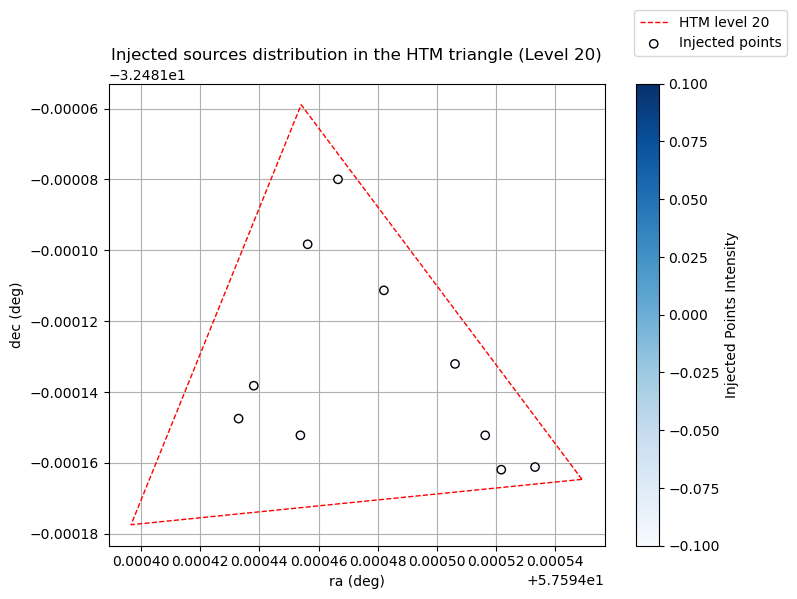

Inj points [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 ------ CALEXP 1/10 ------
Points injected: 10
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Searching flux in source table: 100%|██████████| 10/10 [00:00<00:00, 13.11it/s]


ra = 57.59451632893858, dec = -32.481152201226145
Measured  22.150269634416993 0.033173108565929116
Injected  17.999503336144112
ra = 57.59452175614949, dec = -32.48116190712662
Measured  22.150269634416993 0.033173108565929116
Injected  18.66617000281078
ra = 57.594466576277476, dec = -32.481079951428256
Measured  22.150269634416993 0.033173108565929116
Injected  19.332836669477445
ra = 57.594453860988146, dec = -32.481152202442104
Measured  22.150269634416993 0.033173108565929116
Injected  19.999503336144112
ra = 57.59443297023049, dec = -32.48114748790145
Measured  22.150269634416993 0.033173108565929116
Injected  20.66617000281078
ra = 57.59443810600996, dec = -32.48113820274335
Measured  22.150269634416993 0.033173108565929116
Injected  21.332836669477445
ra = 57.594533166473255, dec = -32.48116116137166
Measured  22.150269634416993 0.033173108565929116
Injected  21.999503336144112
ra = 57.594506129204184, dec = -32.481132055026215
Measured  22.150269634416993 0.033173108565929116

KeyboardInterrupt: 

In [2]:
ratio_lc_area = [0.05,0.1,0.15]
levels = [20,11,10,9]
n_points = [10,50,100]
bands = "ri"
problems = []
# start = False
for n in n_points:
    for lvl in levels:
        for band in bands:
            # if n==100 and lvl==10 and band=="r":
            #     start=True
            # if start:
                print(f"||||||| --- POINTS: {n} --- LEVEL: {lvl} --- BAND {band} ---|||||||||")
                process = Run(name = f"run_{n}pts_{lvl}lvl_{band}", htm_level=lvl)
                process.inject_task()
                schema = process.measure_task()
                params = [{"t_0": 60700.5, "t_E": 110, "u_0": 0.5, "m_base": m} for m in np.linspace(18,24,n)]
                process.add_lc(params[0], ra=57.59451632893858, dec=-32.481152201226145, band = band)
                for p in params[1:]:
                    process.add_lc(p, dist=0.2, band=band)
                process.sky_map(calexps=False)
                print("Inj points", [lc.data["mag"].count() for lc in process.inj_lc] )
                process.log_task("Add and simulate light curves")
                for j, dataId in enumerate(process.calexp_dataIds[:100]):
                    print(f" ------ CALEXP {j+1}/10 ------")
                    calexp = Calexp(dataId)
                    # ax = calexp.plot() # plotear cada calexp con los puntos a inyectar y chequear si efectivamente contiene la cantidad que la funcion de inyeccion dice que contiene
                    injected_exp, injected_points = process.inject_calexp(calexp, save_fit=f"calexp_{j}.fit")
                    if injected_exp != None:
                        sources = process.measure_calexp(injected_exp, schema)
                        flux, flux_err = process.find_flux(sources, injected_points, save=dataId)
                        for f, ferr, lc_idx in zip(flux, flux_err, injected_points):
                            lc = process.inj_lc[lc_idx]
                            mag, mag_err = calexp.get_mag(f, ferr)
                            lc.add_mag(mag, mag_err, dataId)
                            print(f"ra = {lc.ra}, dec = {lc.dec}")
                            print("Measured ", mag, mag_err)
                            print("Injected ", lc.data["mag_sim"][j])
                            if abs(mag-lc.data["mag_sim"][j])>1:
                                problems.append((calexp, lc.ra , lc.dec, sources, mag, mag_err, lc.data["mag_sim"][j], injected_exp))
                    
                process.save_lc()
                process.save_time_log()
                process.time_analysis()
                print("Inj points", [lc.data["mag"].count() for lc in process.inj_lc] )
                process.sky_map()
        


In [3]:
problems[0] 
# (calexp, lc.ra , lc.dec, sources, mag, mag_err, lc.data["mag_sim"][j]), inj_exp)

(<exposures.Calexp at 0x7876e789c290>,
 57.59451632893858,
 -32.481152201226145,
 <class 'lsst.afw.table.SourceCatalog'>
  id       coord_ra      ... base_InvalidPsf_flag
             rad         ...                     
 ---- ------------------ ... --------------------
    1 1.0055686908623955 ...                False
    2 1.0047368301695636 ...                False
    3 1.0038052858211761 ...                False
    4 1.0041554176272214 ...                False
    5 1.0022704616711258 ...                False
    6 1.0042690063655437 ...                False
    7 1.0043903069899056 ...                False
    8 1.0052922751684306 ...                False
    9 1.0048882089617903 ...                False
  ...                ... ...                  ...
 2959 1.0028165790479933 ...                False
 2960 1.0017833503789668 ...                False
 2961  1.002242512991075 ...                False
 2962 1.0020945140663986 ...                False
 2963  1.003455622067551 ... 

Measured in the run:  22.150269634416993 0.033173108565929116   Mag injected = 17.999503336144112


(Measurement(value=17.17951215929650743, error=0.001618734447671637319),
 17.177893424848836,
 17.18113089374418,
 False)

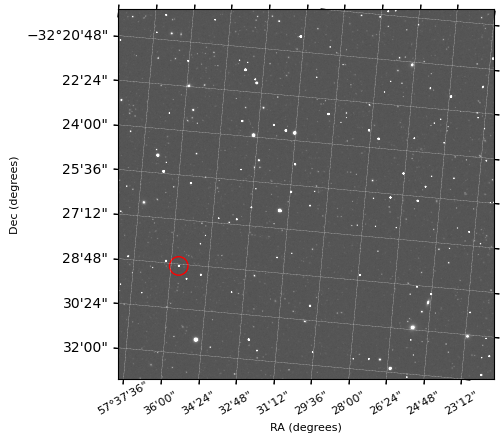

In [4]:
point = problems[0]
calexp = point[0]
ra, dec = point[1], point[2]
sources = point[3]
mag, mag_err, mag_inj = point[4:7]
inj_exposure = point[7]
from lsst.geom import Angle, radians, degrees, SpherePoint
import numpy as np
ra_rad = Angle(ra, degrees).asRadians(); dec_rad = Angle(ra, degrees).asRadians()
near = np.argmin([SpherePoint(ra,dec, degrees).separation(SpherePoint(sources["coord_ra"][i],sources["coord_dec"][i], radians)) for i in range(len(sources))])
new_calexp = Calexp(inj_exposure)
ax = new_calexp.plot()
new_calexp.add_point(ax,sources[near]["coord_ra"].asDegrees(), sources[near]["coord_dec"].asDegrees(), r = 100)
flux = sources["base_PsfFlux_instFlux"][near]; flux_err = sources["base_PsfFlux_instFluxErr"][near]
photoCalib = calexp.expF.getPhotoCalib()
measure = photoCalib.instFluxToMagnitude(flux, flux_err)
print("Measured in the run: ", mag, mag_err, "  Mag injected =", mag_inj)
measure, measure.value-measure.error, measure.value+measure.error, measure.value-measure.error < mag_inj < measure.value+measure.error

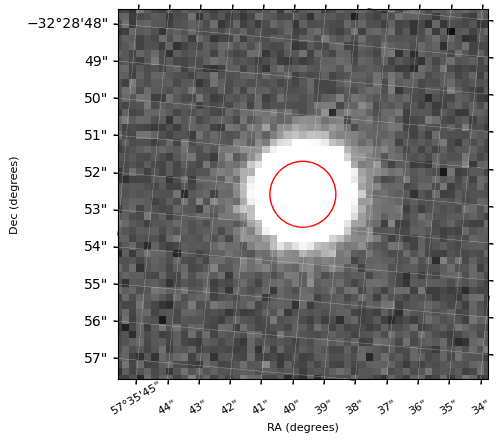

In [67]:
SIGMA_TO_FWHM = 2.0*np.sqrt(2.0*np.log(2.0))
loc = (sources[near]["coord_ra"].asDegrees(), sources[near]["coord_dec"].asDegrees())
loc_pix = Point2D(new_calexp.sky_to_pix(*loc))
sigma = new_calexp.expF.getPsf().computeShape(loc_pix).getDeterminantRadius()
pix_scale = new_calexp.expF.getWcs().getPixelScale()
r = sigma*SIGMA_TO_FWHM
ax = new_calexp.plot(roi = (loc, 50))
new_calexp.add_point(ax, ra, dec, r = r)
# new_calexp.add_point(ax, ra, dec, r=10, c="b")
# loc = (sources[near]["coord_ra"].asDegrees(),sources[near]["coord_dec"].asDegrees())
# cut_calexp = new_calexp.cutout((loc, 1000))
# ax = cut_calexp.plot()
# cut_calexp.add_point(ax,sources[near]["coord_ra"].asDegrees(), sources[near]["coord_dec"].asDegrees(), r = 30)# r.asDegrees()*10)


In [69]:
loc_pix

Point2D(656, 1224)

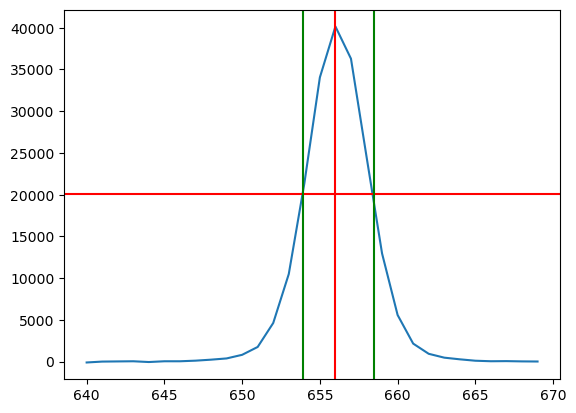

In [115]:
pix = np.arange(640,670)
flux = new_calexp.expF.image.array[1224][pix[0]:pix[-1]+1]
fhmw = max(flux)/2
plt.plot(pix, flux)
plt.axhline(y=fhmw, color='r')
plt.axvline(x=656, color='r')
plt.axvline(x=653.9, color='g')
plt.axvline(x=658.5, color='g')

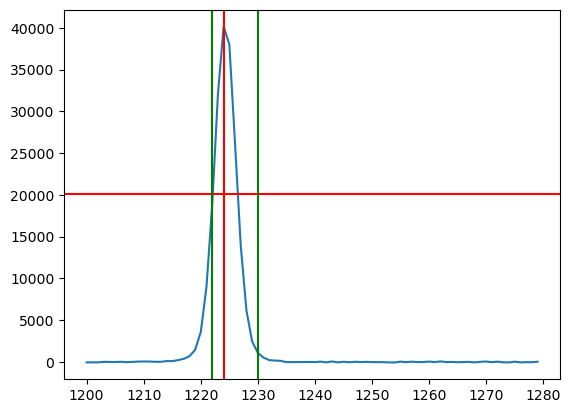

In [125]:
pix = np.arange(1200,1280)
flux = new_calexp.expF.image.array[pix[0]:pix[-1]+1,656]
fhmw = max(flux)/2
plt.plot(pix, flux)
plt.axhline(y=fhmw, color='r')
plt.axvline(x=1224, color='r')
plt.axvline(x=1222, color='g')
plt.axvline(x=1230, color='g')

In [119]:
len(new_calexp.expF.image.array[0])

4072

In [183]:
import numpy as np

def sum_pixels_in_circle(image, center, radius):
    y, x = np.indices(image.shape)
    dist_from_center = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    mask = dist_from_center <= radius
    total_sum = np.sum(image[mask])
    return total_sum, mask

image = new_calexp.expF.image.array
center = loc_pix
radius = sigma * SIGMA_TO_FWHM*3
total, mask = sum_pixels_in_circle(image, center, radius)
print(f"Suma de los píxeles dentro del círculo: {total:.4f}")
photoCalib = calexp.expF.getPhotoCalib()
measure = photoCalib.instFluxToMagnitude(total, flux_err)
measure, sum(sum(mask))

center = np.array(loc_pix)+29
radius = sigma * SIGMA_TO_FWHM*3
total, mask = sum_pixels_in_circle(image, center, radius)
print(f"Suma de los píxeles dentro del círculo: {total:.4f}")
photoCalib = calexp.expF.getPhotoCalib()
measure = photoCalib.instFluxToMagnitude(total, flux_err)
measure, sum(sum(mask))

Suma de los píxeles dentro del círculo: 1018163.8750
Suma de los píxeles dentro del círculo: -2592.9924


(Measurement(value=nan, error=0.6179395326481711415), 561)

In [190]:
m = new_calexp.expF.getMask().array
y, x = np.indices(m.shape)
dist_from_center = np.sqrt((x - center[0])**2 + (y - center[1])**2)
mask = dist_from_center <= radius
m[mask]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [157]:
sources[near]

<class 'lsst.afw.table.SourceRecord'>
id: 869
coord_ra: 1.00521 rad
coord_dec: -0.566903 rad
parent: 0
coord_raErr: 3.85188e-09
coord_decErr: 4.37926e-09
base_SdssCentroid_x: 656.124
base_SdssCentroid_y: 1224.28
base_SdssCentroid_xErr: 0.00471302
base_SdssCentroid_yErr: 0.004522
base_SdssCentroid_flag: 0
base_SdssCentroid_flag_edge: 0
base_SdssCentroid_flag_noSecondDerivative: 0
base_SdssCentroid_flag_almostNoSecondDerivative: 0
base_SdssCentroid_flag_notAtMaximum: 0
base_SdssCentroid_flag_near_edge: 0
base_SdssCentroid_flag_resetToPeak: 0
base_SdssCentroid_flag_badError: 0
base_Blendedness_old: 0
base_Blendedness_raw: 0
base_Blendedness_raw_child_instFlux: 926148
base_Blendedness_raw_parent_instFlux: 926148
base_Blendedness_abs: 0
base_Blendedness_abs_child_instFlux: 926148
base_Blendedness_abs_parent_instFlux: 926148
base_Blendedness_raw_child_xx: 3.82036
base_Blendedness_raw_child_yy: 3.66823
base_Blendedness_raw_child_xy: 0.0536745
base_Blendedness_raw_parent_xx: 3.82036
base_Blend

In [154]:
flux, sigma*SIGMA_TO_FWHM*3

(1003915.8872744954, 13.378196198999358)

In [151]:
measure = photoCalib.instFluxToMagnitude(1003915.8872744954, flux_err)
measure

Measurement(value=17.16802688288094103, error=0.001612479348729438551)

In [6]:
from lsst.geom import Point2D
def getPsfProperties(psf, point):
    """Function to obtain PSF properties.

    Parameters
    ----------
    psf : `lsst.meas.extensions.psfex.PsfexPsf`
        PSF object.
    point : `lsst.geom.Point2D`
        Coordinate where the PSF is being evaluated.

    Returns
    -------
    fwhm : `float`
        Full-width at half maximum: PSF determinant radius
        from SDSS adaptive moments matrix (sigma) times
        SIGMA_TO_FWHM.
    ap_flux : `float`
        PSF flux from aperture photometry weighted
        by a sinc function.
    peak : `float`
        Peak PSF value.
    dims : `lsst.geom.ExtendI`
        PSF postage stamp dimensions.
    """
    sigma = psf.computeShape(point).getDeterminantRadius()
    SIGMA_TO_FWHM = 2.0*np.sqrt(2.0*np.log(2.0))
    fwhm = sigma * SIGMA_TO_FWHM
    ap_flux = psf.computeApertureFlux(radius=sigma, position=point)
    peak = psf.computePeak(position=point)
    dims = psf.computeImage(point).getDimensions()

    print(f"PSF FWHM: {fwhm:.4} pix \n"
          f"PSF flux from aperture photometry: {ap_flux:.4} \n"
          f"Peak PSF value: {peak:.4} \n"
          f"PSF postage stamp dimensions: {dims} \n")

    return (sigma, ap_flux, peak, dims)
getPsfProperties(calexp.expF.getPsf(),Point2D(ra, dec))

PSF FWHM: 4.459 pix 
PSF flux from aperture photometry: 0.3602 
Peak PSF value: 0.04239 
PSF postage stamp dimensions: (41, 41) 



(1.893555037379609, 0.36016983060767, 0.0423935167491436, Extent2I(41, 41))

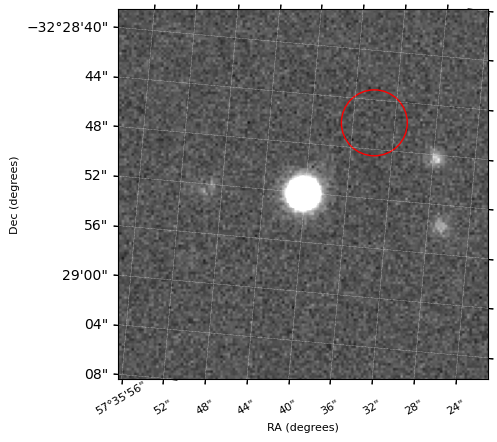

In [182]:
ax = new_calexp.plot(roi = (loc, 150))
new_calexp.add_point(ax, *new_calexp.pix_to_sky(*np.array(loc_pix)+29), r = sigma * SIGMA_TO_FWHM*3)

In [15]:
[(exp[0].data_id) for exp in problems]

[{'visit': 181869, 'detector': 167},
 {'visit': 181869, 'detector': 167},
 {'visit': 181869, 'detector': 167},
 {'visit': 181869, 'detector': 167},
 {'visit': 181869, 'detector': 167},
 {'visit': 181869, 'detector': 167},
 {'visit': 181869, 'detector': 167},
 {'visit': 181938, 'detector': 114},
 {'visit': 181938, 'detector': 114},
 {'visit': 181938, 'detector': 114},
 {'visit': 181938, 'detector': 114},
 {'visit': 181938, 'detector': 114},
 {'visit': 181938, 'detector': 114},
 {'visit': 181938, 'detector': 114},
 {'visit': 181938, 'detector': 114},
 {'visit': 181938, 'detector': 114},
 {'visit': 181965, 'detector': 174},
 {'visit': 181965, 'detector': 174},
 {'visit': 181965, 'detector': 174},
 {'visit': 181965, 'detector': 174},
 {'visit': 181965, 'detector': 174},
 {'visit': 181965, 'detector': 174},
 {'visit': 181965, 'detector': 174},
 {'visit': 181965, 'detector': 174},
 {'visit': 181965, 'detector': 174},
 {'visit': 197402, 'detector': 92},
 {'visit': 197402, 'detector': 92},
 {'